## EDA - MedCalc Dataset

### Importing dataset

In [23]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

splits = {'train': 'data/train-00000-of-00001.parquet', 'test': 'data/test-00000-of-00001.parquet'}
df = pd.read_parquet("hf://datasets/ncbi/MedCalc-Bench-v1.0/" + splits["train"])

df_test = pd.read_parquet("hf://datasets/ncbi/MedCalc-Bench-v1.0/" + splits["test"])

In [24]:
df.columns

Index(['Row Number', 'Calculator ID', 'Calculator Name', 'Category',
       'Output Type', 'Note ID', 'Note Type', 'Patient Note', 'Question',
       'Relevant Entities', 'Ground Truth Answer', 'Lower Limit',
       'Upper Limit', 'Ground Truth Explanation'],
      dtype='object')

In [25]:
cols_to_convert = ['Ground Truth Answer', 'Lower Limit',
       'Upper Limit']

for col in cols_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')

### Calculators Used

Calculator Name
Mean Arterial Pressure (MAP)                                     928
Body Surface Area Calculator                                     909
Maintenance Fluids Calculations                                  869
Ideal Body Weight                                                601
Adjusted Body Weight                                             550
Body Mass Index (BMI)                                            499
CKD-EPI Equations for Glomerular Filtration Rate                 499
CHA2DS2-VASc Score for Atrial Fibrillation Stroke Risk           497
Wells' Criteria for Pulmonary Embolism                           425
Serum Osmolality                                                 350
Delta Gap                                                        311
MDRD GFR Equation                                                292
Free Water Deficit                                               276
Sodium Correction for Hyperglycemia                              275
Delta Ratio       

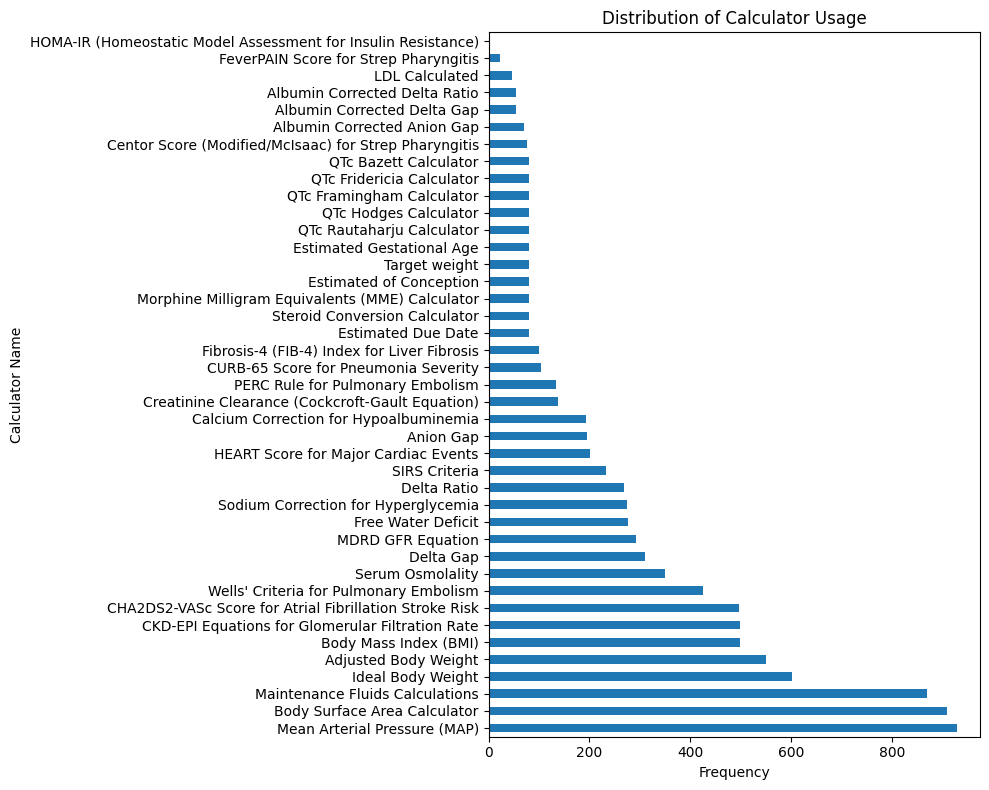

In [26]:

print(df['Calculator Name'].value_counts())
df['Calculator Name'].value_counts().plot(kind='barh', figsize=(10, 8))

plt.title('Distribution of Calculator Usage')
plt.xlabel('Frequency')
plt.ylabel('Calculator Name')
plt.tight_layout()
plt.show()


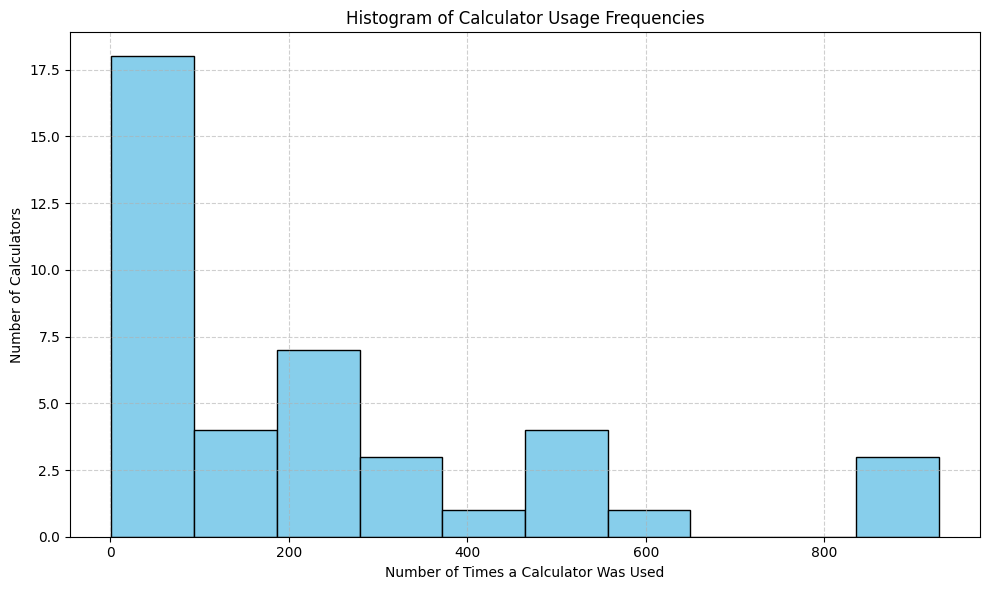

In [27]:
# # Step 1: Count how many times each calculator was used
# calc_counts = df['Calculator Name'].value_counts()

# # Step 2: Count how often each frequency occurs
# freq_of_freqs = calc_counts.value_counts().sort_index()

# # Step 3: Plot
# import matplotlib.pyplot as plt

# plt.figure(figsize=(10, 6))
# freq_of_freqs.plot(kind='bar')

# plt.title('Frequencies of Calculator Usage Counts')
# plt.xlabel('Number of Times a Calculator was Used')
# plt.ylabel('Number of Calculators with that Usage Count')
# plt.xticks(rotation=0)
# plt.tight_layout()
# plt.show()

import matplotlib.pyplot as plt

# Step 1: Count how many times each calculator was used
calc_counts = df['Calculator Name'].value_counts()

# Step 2: Plot a histogram of those frequencies using bins
plt.figure(figsize=(10, 6))
plt.hist(calc_counts, bins=10, edgecolor='black', color='skyblue')

plt.title('Histogram of Calculator Usage Frequencies')
plt.xlabel('Number of Times a Calculator Was Used')
plt.ylabel('Number of Calculators')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



### Categories

Category
physical             4836
lab test             3124
risk                 1229
diagnosis             387
date                  240
dosage conversion     160
severity               77
Name: count, dtype: int64


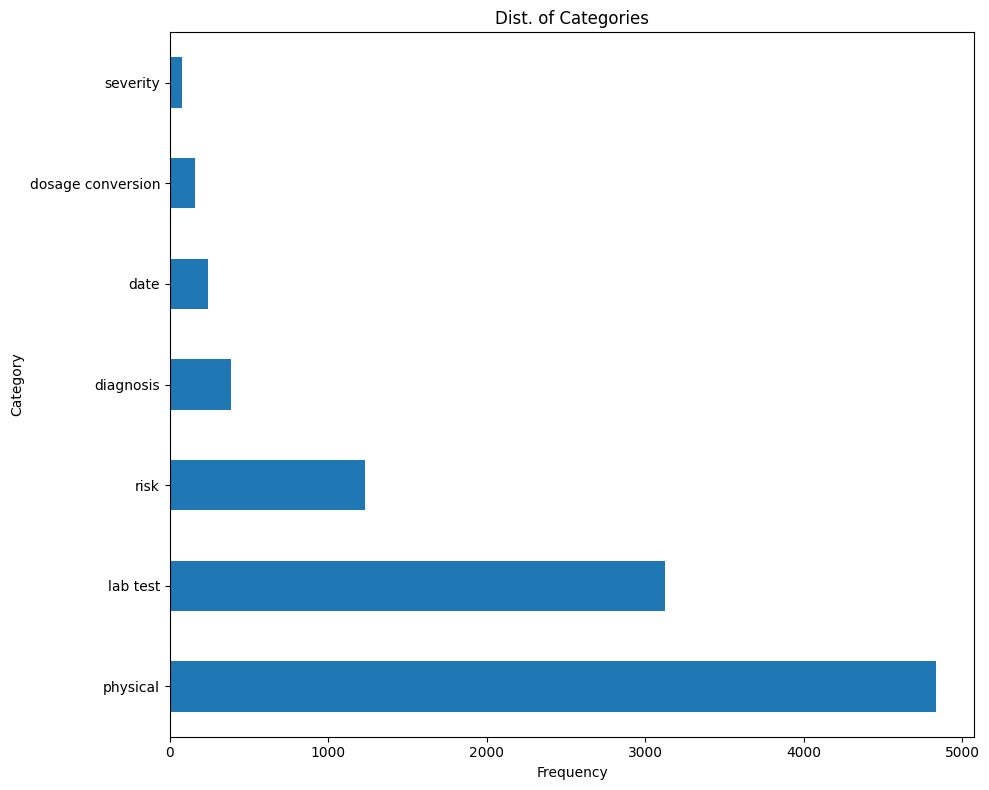

In [28]:
print(df['Category'].value_counts())
df['Category'].value_counts().plot(kind='barh', figsize=(10, 8))

plt.title('Dist. of Categories')
plt.xlabel('Frequency')
plt.ylabel('Category')
plt.tight_layout()
plt.show()

### Patient Note
Character count and distribution

count    10053.000000
mean      2998.744753
std       1908.123766
min         45.000000
25%       1580.000000
50%       2938.000000
75%       4129.000000
max      11774.000000
Name: note_char_count, dtype: float64


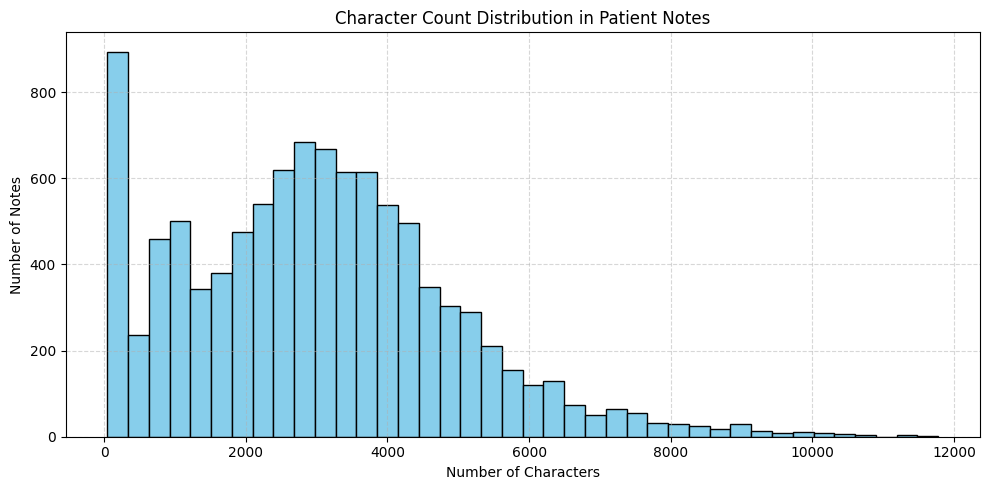

In [29]:
# # Load the dataset
# dataset = load_dataset("ncbi/MedCalc-Bench-v1.0")
# df = dataset["train"].to_pandas()

# Count characters in 'Patient Note'
df["note_char_count"] = df["Patient Note"].astype(str).apply(len)

# Basic stats
print(df["note_char_count"].describe())

# Plot
plt.figure(figsize=(10, 5))
plt.hist(df["note_char_count"], bins=40, color='skyblue', edgecolor='black')
plt.title("Character Count Distribution in Patient Notes")
plt.xlabel("Number of Characters")
plt.ylabel("Number of Notes")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


Spaces present to get an idea about words in the note

count    10053.000000
mean       449.616134
std        285.551850
min          8.000000
25%        235.000000
50%        439.000000
75%        615.000000
max       1769.000000
Name: space_count, dtype: float64


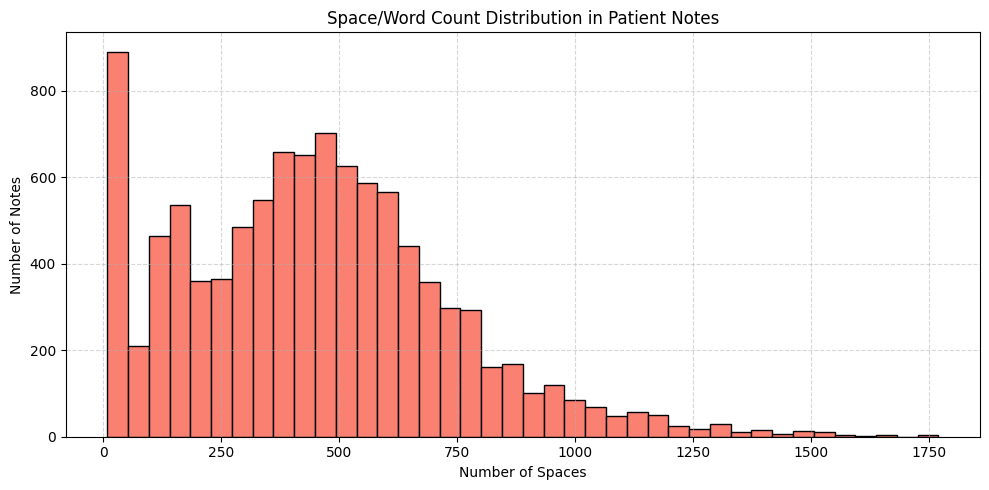

In [30]:
#Train data 
# Count spaces in each Patient Note
df["space_count"] = df["Patient Note"].astype(str).apply(lambda x: x.count(" "))

# Basic stats
print(df["space_count"].describe())

# Plot histogram
plt.figure(figsize=(10, 5))
plt.hist(df["space_count"], bins=40, color='salmon', edgecolor='black')
plt.title("Space/Word Count Distribution in Patient Notes")
plt.xlabel("Number of Spaces")
plt.ylabel("Number of Notes")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


count    1047.000000
mean      474.636103
std       233.888737
min        56.000000
25%       307.000000
50%       453.000000
75%       602.500000
max      1620.000000
Name: space_count, dtype: float64


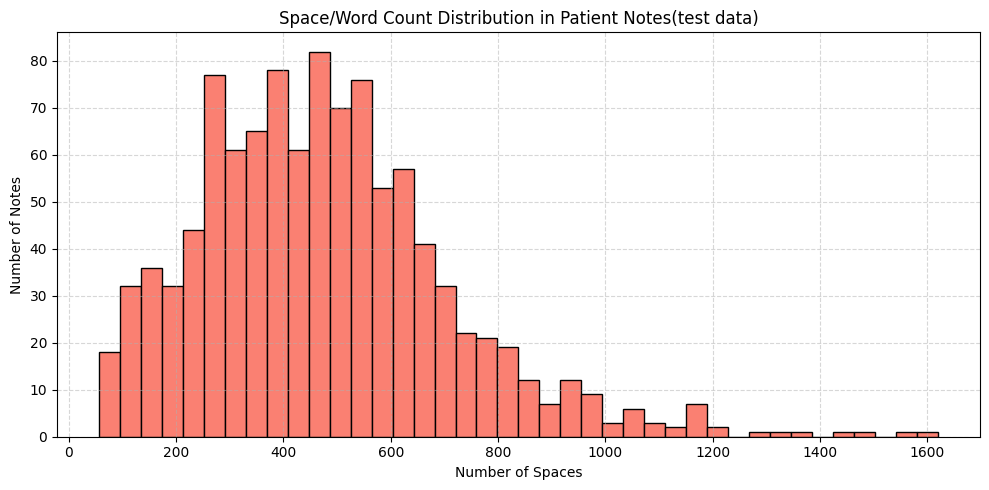

In [31]:

#Test data
# Count spaces in each Patient Note
df_test["space_count"] = df["Patient Note"].astype(str).apply(lambda x: x.count(" "))

# Basic stats
print(df_test["space_count"].describe())

# Plot histogram
plt.figure(figsize=(10, 5))
plt.hist(df_test["space_count"], bins=40, color='salmon', edgecolor='black')
plt.title("Space/Word Count Distribution in Patient Notes(test data)")
plt.xlabel("Number of Spaces")
plt.ylabel("Number of Notes")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



In [32]:
# Count spaces
df["space_count"] = df["Patient Note"].astype(str).apply(lambda x: x.count(" "))

# Filter notes with fewer than a specific number of spaces (e.g., 10)
filtered_df = df[df["space_count"] < 10]

# Print the notes
for i, note in enumerate(filtered_df["Patient Note"]):
    print(f"Note {i+1} (Spaces: {filtered_df.iloc[i]['space_count']}):")
    print(note)
    print(f"Question: {filtered_df.iloc[i]['Question']}")
    print("+" * 15)
    print(f"Answer: {filtered_df.iloc[i]['Ground Truth Answer']}")
    print(f"Explanation: {filtered_df.iloc[i]['Ground Truth Explanation']}")
    print("-" * 50)


Note 1 (Spaces: 8):
Patient has taken 190.936 mg of Hydrocortisone PO. 
Question: Based on the patient's dose of Hydrocortisone PO, what is the equivalent dosage in mg of MethylPrednisoLONE IV? 
+++++++++++++++
Answer: 38.187
Explanation: The mass of Hydrocortisone PO is 190.936 mg. To convert from the Hydrocortisone PO to MethylPrednisoLONE IV, multiply by the conversion factor, 0.2 mg MethylPrednisoLONE IV/Hydrocortisone PO, giving us 190.936 mg Hydrocortisone PO * 0.2 mg MethylPrednisoLONE IV/mg Hydrocortisone PO = 38.187 mg MethylPrednisoLONE IV. 190.936 mg of Hydrocortisone PO is equal to 38.187 mg of MethylPrednisoLONE IV.
--------------------------------------------------
Note 2 (Spaces: 8):
Patient has taken 8.58 mg of Dexamethasone PO. 
Question: Based on the patient's dose of Dexamethasone PO, what is the equivalent dosage in mg of Dexamethasone IV? 
+++++++++++++++
Answer: 8.58
Explanation: The mass of Dexamethasone PO is 8.58 mg. To convert from the Dexamethasone PO to Dexa

In [33]:


# Count spaces in each Patient Note
df["space_count"] = df["Patient Note"].astype(str).apply(lambda x: x.count(" "))

# Basic statistics
mean_val = df["space_count"].mean()
median_val = df["space_count"].median()
std_val = df["space_count"].std()
min_val = df["space_count"].min()
max_val = df["space_count"].max()

# Percentiles
percentiles = df["space_count"].quantile([0.10, 0.25, 0.5, 0.75, 0.90, 0.95, 0.99])

# Print everything
print("📊 Space Count Statistics in 'Patient Note':")
print(f"Mean:   {mean_val:.2f}")
print(f"Median: {median_val}")
print(f"Std:    {std_val:.2f}")
print(f"Min:    {min_val}")
print(f"Max:    {max_val}")
print("\nPercentiles:")
print(percentiles.to_string())


📊 Space Count Statistics in 'Patient Note':
Mean:   449.62
Median: 439.0
Std:    285.55
Min:    8
Max:    1769

Percentiles:
0.10      84.00
0.25     235.00
0.50     439.00
0.75     615.00
0.90     801.00
0.95     956.00
0.99    1293.84


In [34]:
df["Output Type"].value_counts()

Output Type
decimal    8545
integer    1268
date        240
Name: count, dtype: int64

In [35]:
int_rows = df[df["Output Type"] == "integer"]
#checking  frequency of output values
int_freqs = int_rows["Ground Truth Answer"].value_counts()
print(int_freqs.head(10))


Ground Truth Answer
 3.0    284
 2.0    267
 1.0    200
 4.0    195
 0.0     94
 5.0     90
 6.0     75
 7.0     43
 8.0     12
-1.0      6
Name: count, dtype: int64


In [36]:
df.columns
df["Relevant Entities"].head(100)

0     {'sex': 'Female', 'weight': [55.0, 'kg'], 'hei...
1     {'sex': 'Male', 'age': [56, 'years'], 'weight'...
2     {'sex': 'Female', 'age': [59, 'years'], 'weigh...
3     {'sex': 'Male', 'age': [34, 'years'], 'weight'...
4     {'sex': 'Female', 'weight': [62.0, 'kg'], 'hei...
                            ...                        
95    {'sex': 'Male', 'age': [30, 'years'], 'weight'...
96    {'sex': 'Male', 'age': [67, 'years'], 'weight'...
97    {'sex': 'Female', 'age': [69, 'years'], 'weigh...
98    {'sex': 'Male', 'age': [25, 'years'], 'weight'...
99    {'sex': 'Female', 'weight': [66.0, 'kg'], 'hei...
Name: Relevant Entities, Length: 100, dtype: object

In [37]:
df["Ground Truth Answer"].head(10)

0    141.042
1     79.333
2     21.467
3     33.034
4     84.025
5     33.001
6     67.005
7     51.212
8     17.406
9     70.556
Name: Ground Truth Answer, dtype: float64

In [38]:
df["Ground Truth Answer"].apply(type).value_counts()


Ground Truth Answer
<class 'float'>    10053
Name: count, dtype: int64

In [39]:
answers = df["Ground Truth Answer"]
print(answers.head())

numeric_answers = pd.to_numeric(answers, errors="coerce")
sorted_numeric = numeric_answers.dropna().sort_values().reset_index(drop=True)

print("🔢 Sorted Numeric Answers:")
print(sorted_numeric)


0    141.042
1     79.333
2     21.467
3     33.034
4     84.025
Name: Ground Truth Answer, dtype: float64
🔢 Sorted Numeric Answers:
0      -1.990000e+03
1      -6.090000e+02
2      -1.050000e+02
3      -7.700000e+01
4      -6.500000e+01
            ...     
9808    5.544667e+04
9809    9.522540e+04
9810    1.430033e+05
9811    2.160494e+05
9812    2.640221e+07
Name: Ground Truth Answer, Length: 9813, dtype: float64


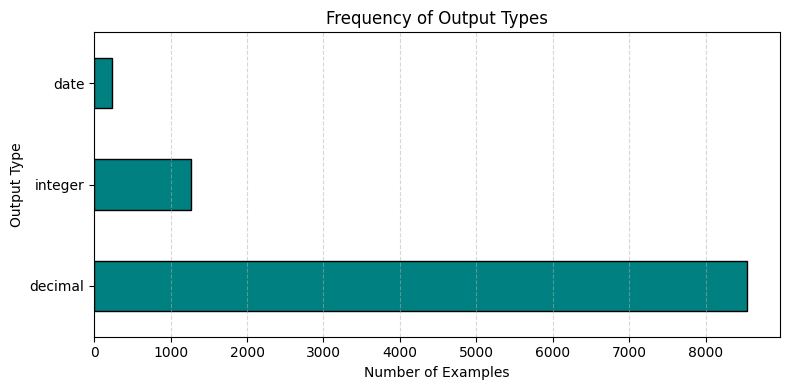

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset

# Load dataset
# df = load_dataset("ncbi/MedCalc-Bench-v1.0")["train"].to_pandas()

# Count frequency of each output type
output_counts = df["Output Type"].value_counts()

# Plot as horizontal bar chart
plt.figure(figsize=(8, 4))
output_counts.plot(kind="barh", color="teal", edgecolor="black")

plt.title("Frequency of Output Types")
plt.xlabel("Number of Examples")
plt.ylabel("Output Type")
plt.grid(axis='x', linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()
# Count frequency of each output type

In [ ]:
import pandas as pd
import ast
from datasets import load_dataset
import matplotlib.pyplot as plt

# Load dataset
df = load_dataset("ncbi/MedCalc-Bench-v1.0")["train"].to_pandas()

# --- Step 1: Safely parse 'Relevant Entities' ---

def safe_parse(val):
    if isinstance(val, dict):
        return val
    try:
        return ast.literal_eval(val)
    except (ValueError, SyntaxError):
        return None

df["Parsed Entities"] = df["Relevant Entities"].apply(safe_parse)

# Drop rows that failed to parse
df_clean = df[df["Parsed Entities"].notnull()].copy()

# --- Step 2: Flatten the dictionary into columns ---

entities_df = pd.json_normalize(df_clean["Parsed Entities"])
# entities_df.head()

# --- Step 3: Extract only numeric values (e.g., from [55, 'kg']) ---

def get_value(item):
    if isinstance(item, list) and item:
        return item[0]
    return item

entities_cleaned = entities_df.applymap(get_value)
print(entities_cleaned)

# --- Step 4: Merge back with original (optional) ---

# df_final = df_clean.reset_index(drop=True).join(entities_cleaned.reset_index(drop=True))

# --- Step 5: Explore the cleaned features ---

# print(df_final[["age", "weight", "height", "sex"]].head())

# # Example scatter plot of weight vs height
# plt.figure(figsize=(6, 4))
# plt.scatter(df_final["weight"], df_final["height"], alpha=0.5)
# plt.xlabel("Weight (kg)")
# plt.ylabel("Height (cm)")
# plt.title("Weight vs Height (from Relevant Entities)")
# plt.grid(True)
# plt.tight_layout()
# plt.show()


In [42]:

# plt.figure(figsize=(6, 4))
# plt.hist(df_final["height"], bins=30, color='skyblue', edgecolor='black')
# # plt.scatter(df_final["weight"], df_final["height"], alpha=0.5)
# # plt.xlabel("Weight (kg)")
# # plt.ylabel("Height (cm)")
# plt.title("Height test")
# plt.grid(True)
# plt.tight_layout()
# plt.show()

In [43]:
# #Saving files to csv or other file formats
# df_final.to_csv("medcalc_cleaned_entities.csv", index=False)
# df_final[["Calculator Name", "sex", "age", "weight", "height"]].to_csv("subset.csv", index=False)
# df_final.to_excel("medcalc_cleaned_entities.xlsx", index=False)

In [44]:
df_clean.sample(5) 

NameError: name 'df_clean' is not defined

In [ ]:
# import ast

# # Safely parse the Relevant Entities column if it's a string
# df["Parsed Entities"] = df["Relevant Entities"].apply(
#     lambda x: x if isinstance(x, dict) else safe_parse(x)
# )

# # Filter rows that contain the "Chloride" key
# chloride_rows = df[df["Parsed Entities"].apply(lambda d: isinstance(d, dict) and "Chloride" in d)]

# # Preview
# print(chloride_rows[["Calculator Name", "Parsed Entities"]].head())

# #chloride_rows.to_csv("chloride_rows.csv", index=False)



In [ ]:
# import pandas as pd
# import ast
# from collections import Counter
# # Parse column
# df["Parsed Entities"] = df["Relevant Entities"].apply(safe_parse)

# # Count all keys across all entity dicts
# entity_counter = Counter()

# for entry in df["Parsed Entities"].dropna():
#     if isinstance(entry, dict):
#         entity_counter.update(entry.keys())

# # Convert to DataFrame for viewing and sorting
# entity_freq_df = pd.DataFrame.from_dict(entity_counter, orient="index", columns=["Frequency"])
# entity_freq_df = entity_freq_df.sort_values("Frequency", ascending=False)

# # Display top entities
# print(entity_freq_df.head(20))


# # Truncate entity names to 10 characters
# entity_freq_df_short = entity_freq_df.copy()
# entity_freq_df_short.index = entity_freq_df_short.index.str.slice(0, 10)

# # Now plot
# entity_freq_df_short.head(20).plot(kind="barh", figsize=(8, 6), color="teal", edgecolor="black")
# plt.gca().invert_yaxis()
# plt.title("Top Entities (Truncated Labels)")
# plt.xlabel("Frequency")
# plt.ylabel("Entity (Truncated)")
# plt.grid(axis="x", linestyle="--", alpha=0.5)
# plt.tight_layout()
# plt.show()


In [ ]:
df.info()

In [ ]:
df

In [ ]:
df.describe()

In [45]:
df.nunique()

Row Number                  10053
Calculator ID                  41
Calculator Name                41
Category                        7
Output Type                     3
Note ID                      7342
Note Type                       2
Patient Note                 7873
Question                       95
Relevant Entities            8045
Ground Truth Answer          5122
Lower Limit                  5125
Upper Limit                  5142
Ground Truth Explanation     8405
note_char_count              4224
space_count                  1158
dtype: int64

In [46]:
df.sort_values(by="space_count", ascending=False).head(10)

,Row Number,Calculator ID,Calculator Name,Category,Output Type,Note ID,Note Type,Patient Note,Question,Relevant Entities,Ground Truth Answer,Lower Limit,Upper Limit,Ground Truth Explanation,note_char_count,space_count
8560,8561,62,Adjusted Body Weight,physical,decimal,pmc-4659239-1,Extracted,"A 50-year-old woman (height 155 cm, weight 54 ...","Using the adjusted body weight formula, what i...","{'sex': 'Female', 'weight': [54.0, 'kg'], 'hei...",50.313,47.797,52.829,The patient's gender is Female.\nThe patient's...,11467,1769
8351,8352,62,Adjusted Body Weight,physical,decimal,pmc-6081828-1,Extracted,A 68-year-old man presented to our institution...,"Using the adjusted body weight formula, what i...","{'sex': 'Male', 'weight': [50.0, 'kg'], 'heigh...",54.673,51.939,57.407,The patient's gender is Male.\nThe patient's h...,11774,1765
1675,1676,5,Mean Arterial Pressure (MAP),physical,decimal,pmc-7305628-1,Extracted,A 64-year-old white man presented to our emerg...,What is patient's mean arterial pressure in mm...,"{'Systolic Blood Pressure': [128.0, 'mm hg'], ...",100.667,95.634,105.700,The mean average pressure is computed by the f...,10807,1741
3071,3072,8,Wells' Criteria for Pulmonary Embolism,risk,decimal,pmc-8364437-1,Extracted,A 74-year-old female patient came in for a fol...,What is the patient's score of Wells' criteria...,{'Previously Documented Pulmonary Embolism': F...,1.000,1.000,1.000,The Well's score for pulmonary embolism is cur...,11224,1670
4017,4018,10,Ideal Body Weight,physical,decimal,pmc-7713822-1,Extracted,The present case report was published with the...,"Using the Ideal Body Weight Formula, what is t...","{'sex': 'Female', 'height': [168.0, 'cm']}",59.627,56.646,62.608,The patient's gender is Female.\nThe patient's...,10715,1651
9016,9017,63,Delta Gap,lab test,decimal,pmc-7713822-1,Extracted,The present case report was published with the...,What is the patient's delta gap in mEq/L?,"{'Chloride': [130.0, 'mEq/L'], 'Bicarbonate': ...",4.600,4.370,4.830,"To compute the formula of the delta gap, the f...",10715,1651
5606,5607,26,Sodium Correction for Hyperglycemia,lab test,decimal,pmc-7713822-1,Extracted,The present case report was published with the...,What is the patient's corrected sodium concent...,"{'Glucose': [15.0, 'mg/dL'], 'Sodium': [157.0,...",154.960,147.212,162.708,The formula for Sodium Correction for Hypergly...,10715,1651
6258,6259,38,Free Water Deficit,lab test,decimal,pmc-7713822-1,Extracted,The present case report was published with the...,What is the patient's free water deficit in te...,"{'age': [23, 'years'], 'weight': [42.0, 'kg'],...",2.550,2.422,2.677,The formula for computing the free water defic...,10715,1651
439,440,3,CKD-EPI Equations for Glomerular Filtration Rate,lab test,decimal,pmc-4940809-1,Extracted,A 74-year-old man with an unremarkable medical...,"Using the 2021 CKD-EPI Creatinine equation, wh...","{'age': [74, 'years'], 'creatinine': [266.0, '...",21.133,20.076,22.190,The formula for computing GFR is 142 x (Scr/A)...,11206,1620
3886,3887,10,Ideal Body Weight,physical,decimal,pmc-2804009-1,Extracted,"The long-term treatment period of a Finnish, e...","Using the Ideal Body Weight Formula, what is t...","{'sex': 'Female', 'height': [178.0, 'cm']}",68.682,65.248,72.116,The patient's gender is Female.\nThe patient's...,9745,1594


                     Row Number  Calculator ID  Ground Truth Answer  \
Row Number             1.000000       0.923738            -0.001678   
Calculator ID          0.923738       1.000000            -0.004237   
Ground Truth Answer   -0.001678      -0.004237             1.000000   
Lower Limit           -0.001677      -0.004237             1.000000   
Upper Limit           -0.001679      -0.004238             1.000000   
note_char_count       -0.084953      -0.041535            -0.002348   
space_count           -0.079149      -0.036266            -0.002907   

                     Lower Limit  Upper Limit  note_char_count  space_count  
Row Number             -0.001677    -0.001679        -0.084953    -0.079149  
Calculator ID          -0.004237    -0.004238        -0.041535    -0.036266  
Ground Truth Answer     1.000000     1.000000        -0.002348    -0.002907  
Lower Limit             1.000000     1.000000        -0.002349    -0.002908  
Upper Limit             1.000000     1.00

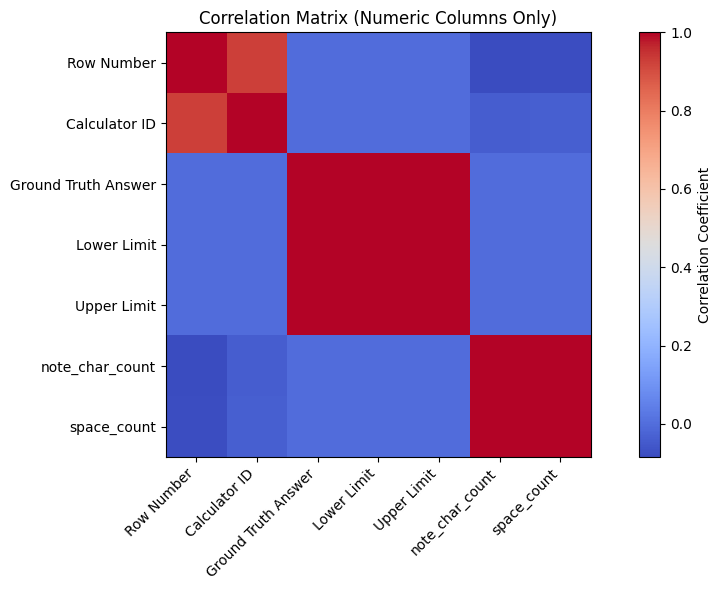

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

# Assume df is already loaded (e.g., from MedCalc-Bench)
# Select only numeric columns
numeric_df = df.select_dtypes(include="number")

# Compute correlation matrix
correlation_matrix = numeric_df.corr()

# Print correlation matrix
print(correlation_matrix)

# Optional: visualize with matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(correlation_matrix, cmap="coolwarm", interpolation="nearest")
plt.colorbar(label="Correlation Coefficient")
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45, ha='right')
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title("Correlation Matrix (Numeric Columns Only)")
plt.tight_layout()
plt.show()


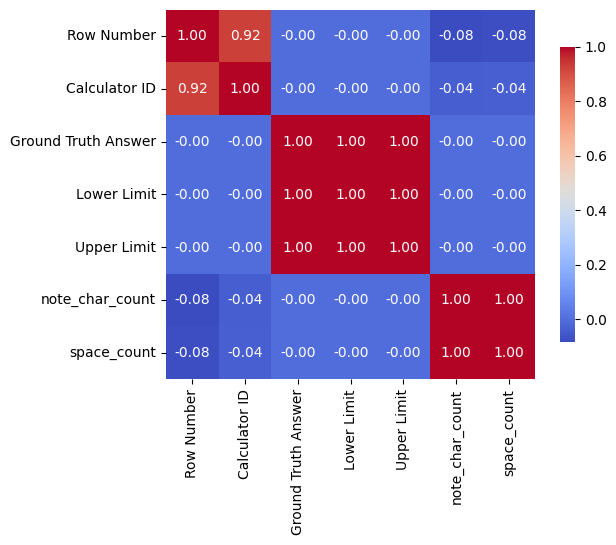

In [53]:
import seaborn as sns   
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": .8})
# plt.rcParams
plt.show()

In [54]:
df

,Row Number,Calculator ID,Calculator Name,Category,Output Type,Note ID,Note Type,Patient Note,Question,Relevant Entities,Ground Truth Answer,Lower Limit,Upper Limit,Ground Truth Explanation,note_char_count,space_count
0,1,2,Creatinine Clearance (Cockcroft-Gault Equation),lab test,decimal,pmc-6477550-1,Extracted,A 16-year-old female adolescent was referred t...,What is the patient's Creatinine Clearance usi...,"{'sex': 'Female', 'weight': [55.0, 'kg'], 'hei...",141.042,133.990,148.094,The formula for computing Cockcroft-Gault is g...,3194,441
1,2,2,Creatinine Clearance (Cockcroft-Gault Equation),lab test,decimal,pmc-3597915-1,Extracted,A 56-year-old man was admitted to the renal un...,What is the patient's Creatinine Clearance usi...,"{'sex': 'Male', 'age': [56, 'years'], 'weight'...",79.333,75.366,83.300,The formula for computing Cockcroft-Gault is g...,3443,545
2,3,2,Creatinine Clearance (Cockcroft-Gault Equation),lab test,decimal,pmc-7737526-1,Extracted,"In 2008, a 59-year-old Japanese woman was admi...",What is the patient's Creatinine Clearance usi...,"{'sex': 'Female', 'age': [59, 'years'], 'weigh...",21.467,20.394,22.540,The formula for computing Cockcroft-Gault is g...,4041,622
3,4,2,Creatinine Clearance (Cockcroft-Gault Equation),lab test,decimal,pmc-2813128-1,Extracted,A 34-year-old man was admitted for evaluation ...,What is the patient's Creatinine Clearance usi...,"{'sex': 'Male', 'age': [34, 'years'], 'weight'...",33.034,31.382,34.686,The formula for computing Cockcroft-Gault is g...,2907,427
4,5,2,Creatinine Clearance (Cockcroft-Gault Equation),lab test,decimal,pmc-5544981-1,Extracted,A 67-year-old Japanese woman underwent OWHTO t...,What is the patient's Creatinine Clearance usi...,"{'sex': 'Female', 'weight': [62.0, 'kg'], 'hei...",84.025,79.824,88.226,The formula for computing Cockcroft-Gault is g...,9918,1544
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10048,10049,69,Estimated Gestational Age,date,date,97,Template,The patient's last menstrual period was on 08/...,"Based on the patient's last menstrual period, ...","{'Current Date': '04/13/2022', 'Last menstrual...",NaN,NaN,NaN,"To compute the estimated gestational age, we c...",82,11
10049,10050,69,Estimated Gestational Age,date,date,98,Template,The patient's last menstrual period was on 07/...,"Based on the patient's last menstrual period, ...","{'Current Date': '12/12/2021', 'Last menstrual...",NaN,NaN,NaN,"To compute the estimated gestational age, we c...",82,11
10050,10051,69,Estimated Gestational Age,date,date,99,Template,The patient's last menstrual period was on 11/...,"Based on the patient's last menstrual period, ...","{'Current Date': '07/30/2014', 'Last menstrual...",NaN,NaN,NaN,"To compute the estimated gestational age, we c...",82,11
10051,10052,69,Estimated Gestational Age,date,date,100,Template,The patient's last menstrual period was on 08/...,"Based on the patient's last menstrual period, ...","{'Current Date': '02/04/2005', 'Last menstrual...",NaN,NaN,NaN,"To compute the estimated gestational age, we c...",82,11


In [62]:
df.groupby('Calculator Name')

In [60]:
df[df['Calculator Name'] == 'Albumin Corrected Anion Gap'].head(10)

,Row Number,Calculator ID,Calculator Name,Category,Output Type,Note ID,Note Type,Patient Note,Question,Relevant Entities,Ground Truth Answer,Lower Limit,Upper Limit,Ground Truth Explanation,note_char_count,space_count
9473,9474,65,Albumin Corrected Anion Gap,lab test,decimal,pmc-3519780-1,Extracted,A 43 year-old male was referred to the Emergen...,What is the patient's albumin corrected anion ...,"{'Chloride': [100.0, 'mmol/L'], 'Albumin': [4....",14.00,13.300,14.700,The formula for computing a patient's albumin ...,6465,997
9474,9475,65,Albumin Corrected Anion Gap,lab test,decimal,pmc-4241748-1,Extracted,A 47-year-old man arrived to the emergency roo...,What is the patient's albumin corrected anion ...,"{'Chloride': [89.0, 'mmol/L'], 'Albumin': [2.1...",25.05,23.797,26.303,The formula for computing a patient's albumin ...,3240,476
9475,9476,65,Albumin Corrected Anion Gap,lab test,decimal,pmc-4417668-1,Extracted,"A 20-year-old female, unmarried, was admitted ...",What is the patient's albumin corrected anion ...,"{'Chloride': [101.0, 'mEq/L'], 'Albumin': [1.8...",22.50,21.375,23.625,The formula for computing a patient's albumin ...,6477,966
9476,9477,65,Albumin Corrected Anion Gap,lab test,decimal,pmc-2827053-1,Extracted,"A 36-year-old, previously healthy Hispanic fem...",What is the patient's albumin corrected anion ...,"{'Chloride': [103.0, 'mmol/L'], 'Albumin': [3....",7.25,6.887,7.613,The formula for computing a patient's albumin ...,3228,480
9477,9478,65,Albumin Corrected Anion Gap,lab test,decimal,usmle-7444,Extracted,A 66-year-old man presents to your office for ...,What is the patient's albumin corrected anion ...,"{'Chloride': [100.0, 'mEq/L'], 'Albumin': [3.8...",17.50,16.625,18.375,The formula for computing a patient's albumin ...,1678,216
9478,9479,65,Albumin Corrected Anion Gap,lab test,decimal,pmc-8677960-1,Extracted,An 8-year-old Chinese boy with no specific fam...,What is the patient's albumin corrected anion ...,"{'Chloride': [112.1, 'mmol/L'], 'Albumin': [10...",19.50,18.525,20.475,The formula for computing a patient's albumin ...,4762,701
9479,9480,65,Albumin Corrected Anion Gap,lab test,decimal,pmc-3186895-1,Extracted,Case : A 30-year-old male was admitted to our ...,What is the patient's albumin corrected anion ...,"{'Chloride': [68.0, 'mEq/L'], 'Albumin': [3.4,...",14.30,13.585,15.015,The formula for computing a patient's albumin ...,4756,714
9480,9481,65,Albumin Corrected Anion Gap,lab test,decimal,pmc-4950766-1,Extracted,A 69 year old Hispanic female with a past medi...,What is the patient's albumin corrected anion ...,"{'Chloride': [103.0, 'mEq/L'], 'Albumin': [2.2...",9.50,9.025,9.975,The formula for computing a patient's albumin ...,10214,1479
9481,9482,65,Albumin Corrected Anion Gap,lab test,decimal,pmc-2556317-1,Extracted,A 55 year old post menopausal Caucasian female...,What is the patient's albumin corrected anion ...,"{'Chloride': [99.0, 'mmol/L'], 'Albumin': [33....",11.75,11.162,12.338,The formula for computing a patient's albumin ...,3722,543
9482,9483,65,Albumin Corrected Anion Gap,lab test,decimal,pmc-2481241-1,Extracted,A 52-year-old white male with O2-dependent COP...,What is the patient's albumin corrected anion ...,"{'Chloride': [95.0, 'mmol/L'], 'Albumin': [3.6...",-64.00,-67.200,-60.800,The formula for computing a patient's albumin ...,3100,451


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Count spaces in each column
df["note_space_count"] = df["Patient Note"].astype(str).apply(lambda x: x.count(" "))
df["question_space_count"] = df["Question"].astype(str).apply(lambda x: x.count(" "))

# Prepare data for boxplot
data_to_plot = [df["note_space_count"], df["question_space_count"]]

# Plot boxplot
plt.figure(figsize=(8, 5))
plt.boxplot(data_to_plot, labels=["Patient Note", "Question"], patch_artist=True)

plt.title("Box Plot of Space Counts")
plt.ylabel("Number of Spaces")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


In [68]:
df.select_dtypes(include="object")

,Calculator Name,Category,Output Type,Note ID,Note Type,Patient Note,Question,Relevant Entities,Ground Truth Explanation
0,Creatinine Clearance (Cockcroft-Gault Equation),lab test,decimal,pmc-6477550-1,Extracted,A 16-year-old female adolescent was referred t...,What is the patient's Creatinine Clearance usi...,"{'sex': 'Female', 'weight': [55.0, 'kg'], 'hei...",The formula for computing Cockcroft-Gault is g...
1,Creatinine Clearance (Cockcroft-Gault Equation),lab test,decimal,pmc-3597915-1,Extracted,A 56-year-old man was admitted to the renal un...,What is the patient's Creatinine Clearance usi...,"{'sex': 'Male', 'age': [56, 'years'], 'weight'...",The formula for computing Cockcroft-Gault is g...
2,Creatinine Clearance (Cockcroft-Gault Equation),lab test,decimal,pmc-7737526-1,Extracted,"In 2008, a 59-year-old Japanese woman was admi...",What is the patient's Creatinine Clearance usi...,"{'sex': 'Female', 'age': [59, 'years'], 'weigh...",The formula for computing Cockcroft-Gault is g...
3,Creatinine Clearance (Cockcroft-Gault Equation),lab test,decimal,pmc-2813128-1,Extracted,A 34-year-old man was admitted for evaluation ...,What is the patient's Creatinine Clearance usi...,"{'sex': 'Male', 'age': [34, 'years'], 'weight'...",The formula for computing Cockcroft-Gault is g...
4,Creatinine Clearance (Cockcroft-Gault Equation),lab test,decimal,pmc-5544981-1,Extracted,A 67-year-old Japanese woman underwent OWHTO t...,What is the patient's Creatinine Clearance usi...,"{'sex': 'Female', 'weight': [62.0, 'kg'], 'hei...",The formula for computing Cockcroft-Gault is g...
...,...,...,...,...,...,...,...,...,...
10048,Estimated Gestational Age,date,date,97,Template,The patient's last menstrual period was on 08/...,"Based on the patient's last menstrual period, ...","{'Current Date': '04/13/2022', 'Last menstrual...","To compute the estimated gestational age, we c..."
10049,Estimated Gestational Age,date,date,98,Template,The patient's last menstrual period was on 07/...,"Based on the patient's last menstrual period, ...","{'Current Date': '12/12/2021', 'Last menstrual...","To compute the estimated gestational age, we c..."
10050,Estimated Gestational Age,date,date,99,Template,The patient's last menstrual period was on 11/...,"Based on the patient's last menstrual period, ...","{'Current Date': '07/30/2014', 'Last menstrual...","To compute the estimated gestational age, we c..."
10051,Estimated Gestational Age,date,date,100,Template,The patient's last menstrual period was on 08/...,"Based on the patient's last menstrual period, ...","{'Current Date': '02/04/2005', 'Last menstrual...","To compute the estimated gestational age, we c..."


## PERC Rule for Pulmonary Embolism
### Seven Criteria of PERC Rule


1. Age < 50 years
2. Heart rate < 100 bpm
3. Oxygen saturation ≥ 95% 
4. No hemoptysis
5. No estrogen use
6. No prior venous thromboembolism (VTE)
7. No unilateral leg swelling


/Users/malthehli/Documents/ai_paper_tool/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/malthehli/Documents/ai_paper_tool/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/var/folders/y5/cg9ckmtx691dkg8sg071p0qw0000gq/T/ipykernel_65801/3965712804.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  perc_df["space_count"] = perc_df["Patient Note"].astype(s

Training Data
count     133.000000
mean      478.037594
std       250.493192
min        80.000000
25%       300.000000
50%       469.000000
75%       639.000000
max      1378.000000
Name: space_count, dtype: float64

Test Data
count     20.000000
mean     434.900000
std      204.539508
min       90.000000
25%      333.750000
50%      413.000000
75%      536.500000
max      795.000000
Name: space_count, dtype: float64


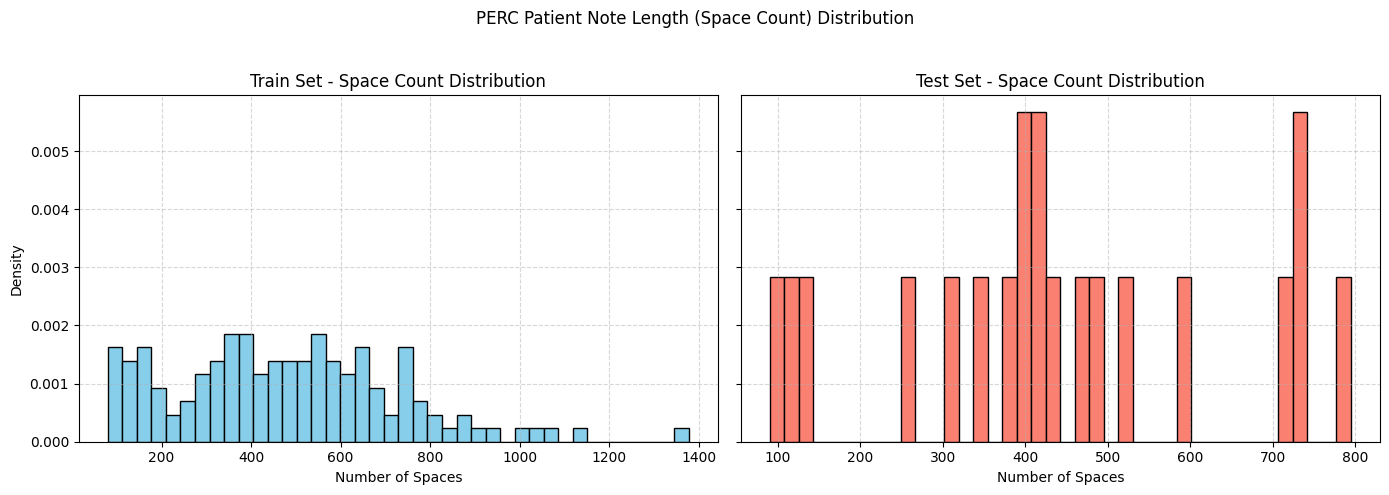

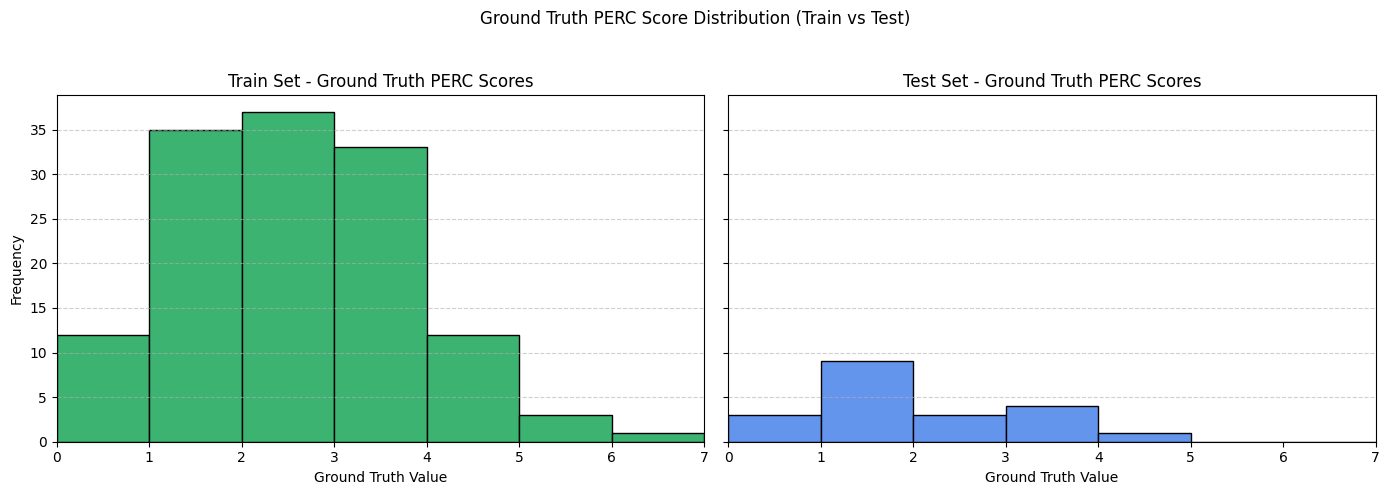

In [1]:

### Quick Overview
from datasets import load_dataset
import pandas as pd
import ast
import json
import matplotlib.pyplot as plt
import os
import requests
import sys
import re
import numpy as np
import asyncio
import aiohttp
from typing import List
import seaborn as sns
import builtins 

# Load dataset
dataset = load_dataset("ncbi/MedCalc-Bench-v1.0")
df = dataset["train"].to_pandas()  # or "test"
df_test = dataset["test"].to_pandas()  # or "test"
# Filter for calculator name "PERC"

perc_df = df[df["Calculator Name"] == "PERC Rule for Pulmonary Embolism"]
perc_df.head(5)

perc_df_test = df_test[df_test["Calculator Name"] == "PERC Rule for Pulmonary Embolism"]
perc_df_test.head(5)
perc_df["Relevant Entities"].iloc[0]


# Train: space count
perc_df["space_count"] = perc_df["Patient Note"].astype(str).apply(lambda x: x.count(" "))

# Test: space count
perc_df_test["space_count"] = perc_df_test["Patient Note"].astype(str).apply(lambda x: x.count(" "))

# Basic stats
print("Training Data")
print(perc_df["space_count"].describe())

print("\nTest Data")
print(perc_df_test["space_count"].describe())

# Plot side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

axes[0].hist(perc_df["space_count"], bins=40, color='skyblue', edgecolor='black', density=True)
axes[0].set_title("Train Set - Space Count Distribution")
axes[0].set_xlabel("Number of Spaces")
axes[0].set_ylabel("Density")
axes[0].grid(True, linestyle='--', alpha=0.5)

axes[1].hist(perc_df_test["space_count"], bins=40, color='salmon', edgecolor='black', density=True)
axes[1].set_title("Test Set - Space Count Distribution")
axes[1].set_xlabel("Number of Spaces")
axes[1].grid(True, linestyle='--', alpha=0.5)

plt.suptitle("PERC Patient Note Length (Space Count) Distribution")
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

"{'age': [73, 'years'], 'Heart Rate or Pulse': [92.0, 'beats per minute'], 'Hemoptysis': False, 'O₂ saturation percentage': [98.0, '%'], 'Unilateral Leg Swelling': False, 'Hormone use': True, 'Recent surgery or trauma': True, 'Previously documented Deep Vein Thrombosis': False, 'Previously Documented Pulmonary Embolism': False}"

# Ensure Ground Truth Answer is numeric and use .loc
perc_df.loc[:, "Ground Truth Answer"] = pd.to_numeric(perc_df["Ground Truth Answer"], errors="coerce")
perc_df_test.loc[:, "Ground Truth Answer"] = pd.to_numeric(perc_df_test["Ground Truth Answer"], errors="coerce")

# Drop NaNs
cleaned_train = perc_df["Ground Truth Answer"].dropna()
cleaned_test = perc_df_test["Ground Truth Answer"].dropna()

# Plot side-by-side histograms
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

bins = range(0, 8)  # PERC scores range from 0 to 7

axes[0].hist(cleaned_train, bins=bins, color="mediumseagreen", edgecolor="black")
axes[0].set_title("Train Set - Ground Truth PERC Scores")
axes[0].set_xlabel("Ground Truth Value")
axes[0].set_ylabel("Frequency")
axes[0].set_xlim(0, 7)
axes[0].grid(axis="y", linestyle="--", alpha=0.6)

axes[1].hist(cleaned_test, bins=bins, color="cornflowerblue", edgecolor="black")
axes[1].set_title("Test Set - Ground Truth PERC Scores")
axes[1].set_xlabel("Ground Truth Value")
axes[1].set_xlim(0, 7)
axes[1].grid(axis="y", linestyle="--", alpha=0.6)

plt.suptitle("Ground Truth PERC Score Distribution (Train vs Test)")
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
